In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("run_or_walk.csv")

In [5]:
df

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [7]:
df.shape

(88588, 11)

In [8]:
df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [9]:
df.isna().any()

date              False
time              False
username          False
wrist             False
activity          False
acceleration_x    False
acceleration_y    False
acceleration_z    False
gyro_x            False
gyro_y            False
gyro_z            False
dtype: bool

In [10]:
df['activity'].unique()

array([0, 1], dtype=int64)

In [11]:
print("Walking activity:", (df['activity'] == 0).sum(axis=0))
print("Running activity:", (df['activity'] == 1).sum(axis=0))

Walking activity: 44223
Running activity: 44365


In [12]:
df['wrist'].unique()

array([0, 1], dtype=int64)

In [13]:

print("Left Wrist:", (df['wrist'] == 0).sum(axis=0))
print("Right Wrist:", (df['wrist'] == 1).sum(axis=0))

Left Wrist: 42330
Right Wrist: 46258


In [14]:
cols = ['date', 'time']
df['datetime'] = df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [15]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,datetime
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017-6-30 13:51:15:847724020
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017-6-30 13:51:16:246945023
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,2017-6-30 13:51:16:446233987
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,2017-6-30 13:51:16:646117985
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,2017-6-30 13:51:16:846738994


In [16]:
rw=df[['activity', 'wrist', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z','datetime']]

In [17]:
rw.dtypes

activity            int64
wrist               int64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
datetime           object
dtype: object

In [18]:
rw['Datetime'] =  pd.to_datetime(rw['datetime'], format='%Y-%m-%d %H:%M:%S:%f')
rw1 = rw.drop('datetime', axis = 1)
rw1

,activity,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Datetime
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017-06-30 13:51:15.847724020
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017-06-30 13:51:16.246945023
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,2017-06-30 13:51:16.446233987
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,2017-06-30 13:51:16.646117985
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,2017-06-30 13:51:16.846738994
...,...,...,...,...,...,...,...,...,...
88583,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,2017-07-09 20:09:15.317911028
88584,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,2017-07-09 20:09:15.517889022
88585,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,2017-07-09 20:09:15.717828989
88586,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,2017-07-09 20:09:15.917932987


In [19]:
rw1.dtypes

activity                   int64
wrist                      int64
acceleration_x           float64
acceleration_y           float64
acceleration_z           float64
gyro_x                   float64
gyro_y                   float64
gyro_z                   float64
Datetime          datetime64[ns]
dtype: object

In [20]:
rw1.describe()

,activity,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.500801,0.522170,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.500002,0.499511,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


<AxesSubplot:>

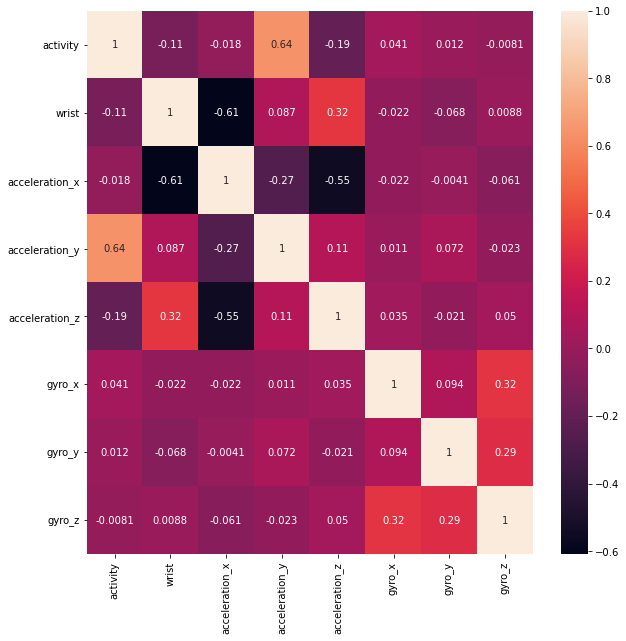

In [21]:
plt.figure(figsize=(10,10))

sns.heatmap(rw1.corr(),annot=True)

### acceleration_y is strongly corrrelated with activity, that means data is collected on acceleration_y is well correlated for Predicting 'Run or Walk' Activity.

In [22]:
from pylab import rcParams
plt.style.use('fivethirtyeight')
rcParams['figure.figsize']=(16,6)

<AxesSubplot:>

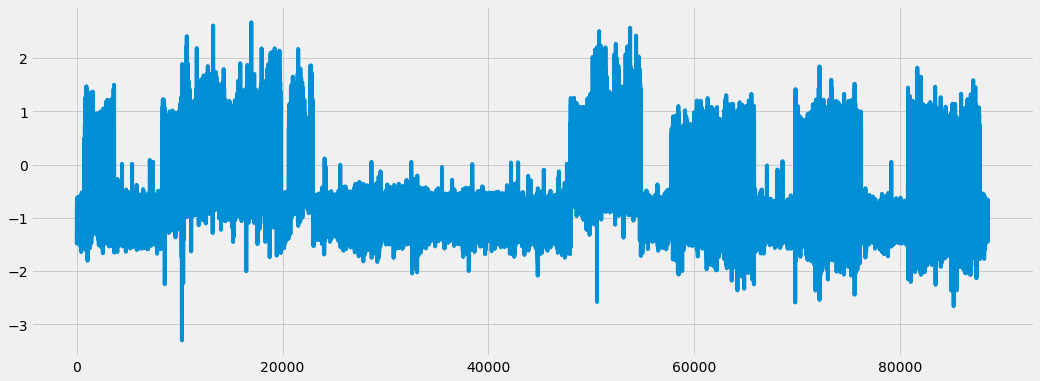

In [155]:
rw1['acceleration_y'].plot()

Text(0.5, 0, 'Date')

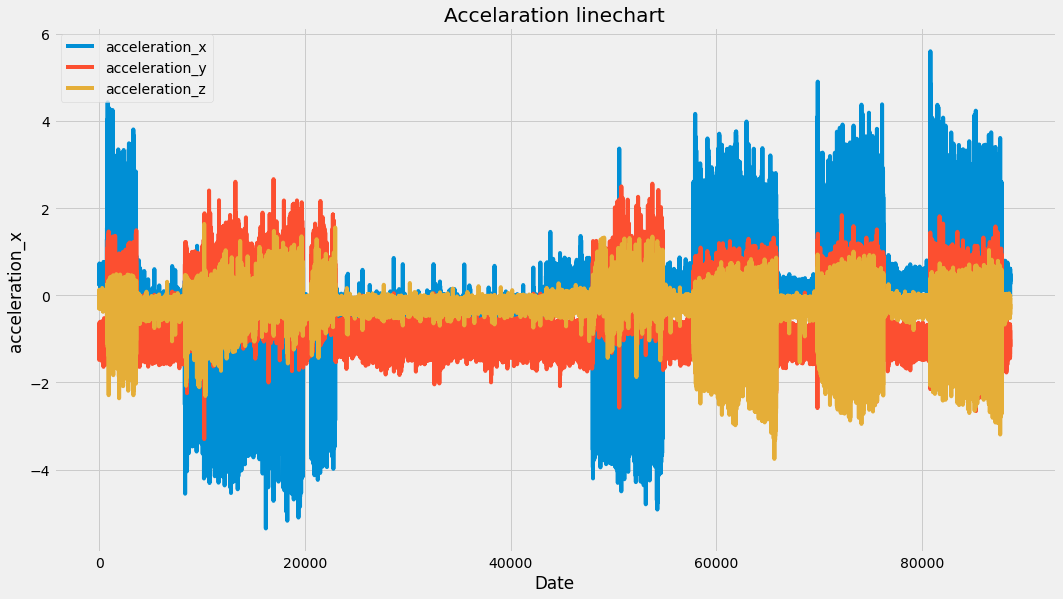

In [156]:
my_figsize = (16, 9)
plt.figure(figsize=my_figsize)

plt.title('Accelaration linechart')
sns.lineplot(data=rw1['acceleration_x'], label='acceleration_x')
sns.lineplot(data=rw1['acceleration_y'], label='acceleration_y')
sns.lineplot(data=rw1['acceleration_z'], label='acceleration_z')
plt.xlabel("Date")

<AxesSubplot:>

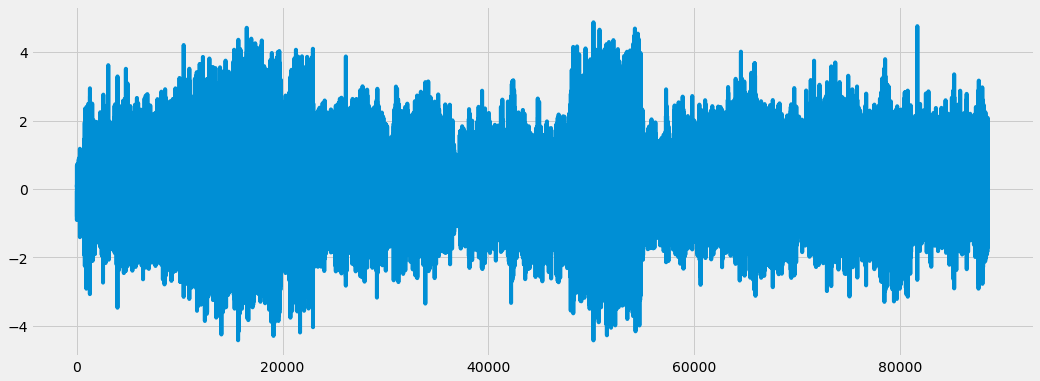

In [24]:
rw1['gyro_x'].plot()

<AxesSubplot:xlabel='activity', ylabel='acceleration_y'>

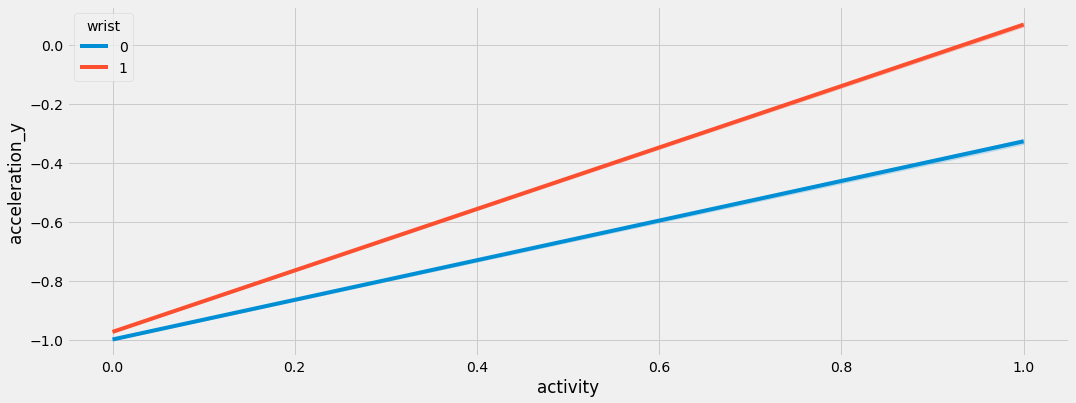

In [25]:
sns.lineplot(x="activity", y="acceleration_y",hue='wrist', data=rw1)

<AxesSubplot:xlabel='activity', ylabel='acceleration_y'>

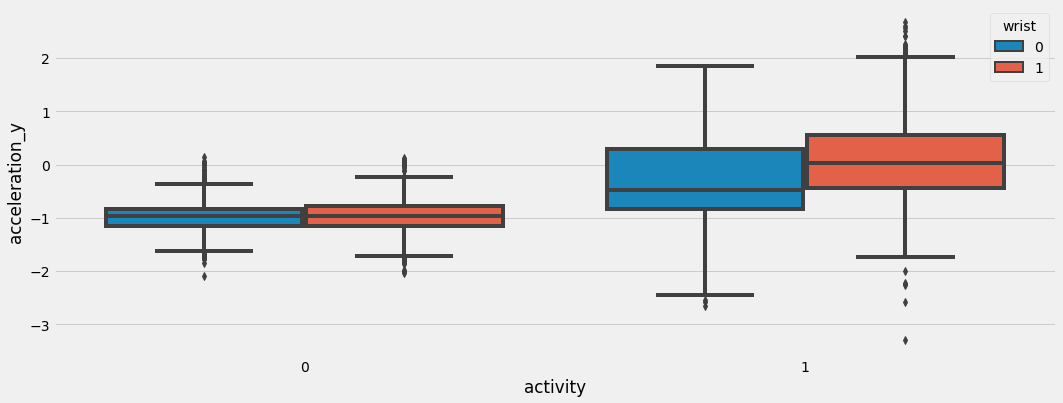

In [26]:
sns.boxplot(x="activity", y="acceleration_y",hue='wrist', data=rw1)

<AxesSubplot:xlabel='activity', ylabel='gyro_x'>

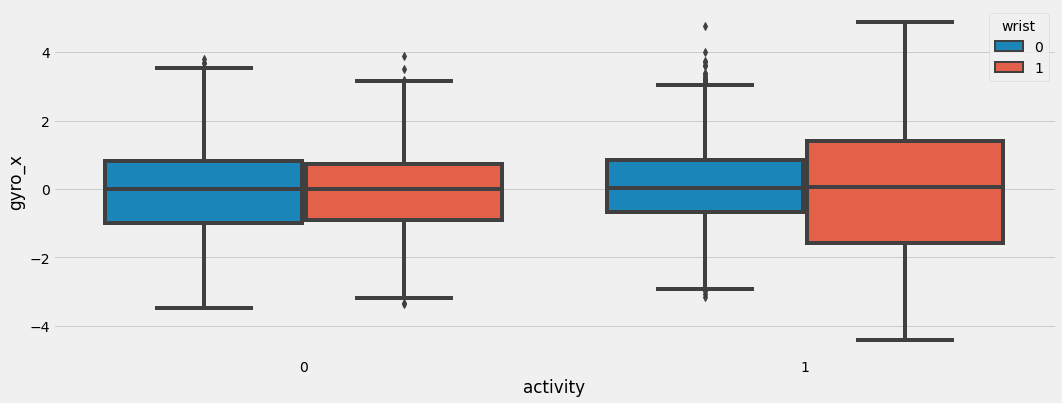

In [27]:
sns.boxplot(x="activity", y="gyro_x",hue='wrist', data=rw1)

<AxesSubplot:xlabel='activity', ylabel='gyro_z'>

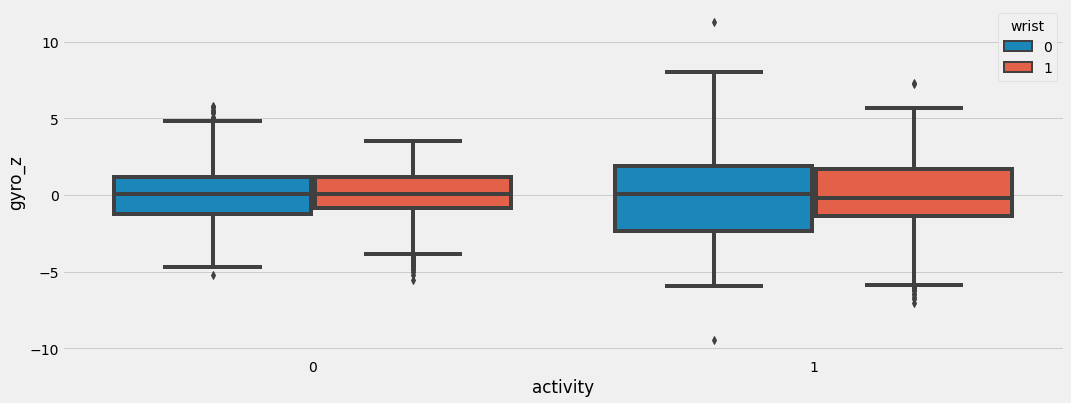

In [28]:
sns.boxplot(x="activity", y="gyro_z",hue='wrist', data=rw1)

### all above visualization shows that more data collected while 'Running' and well collected on Right Wrist 

Text(0, 0.5, 'activity')

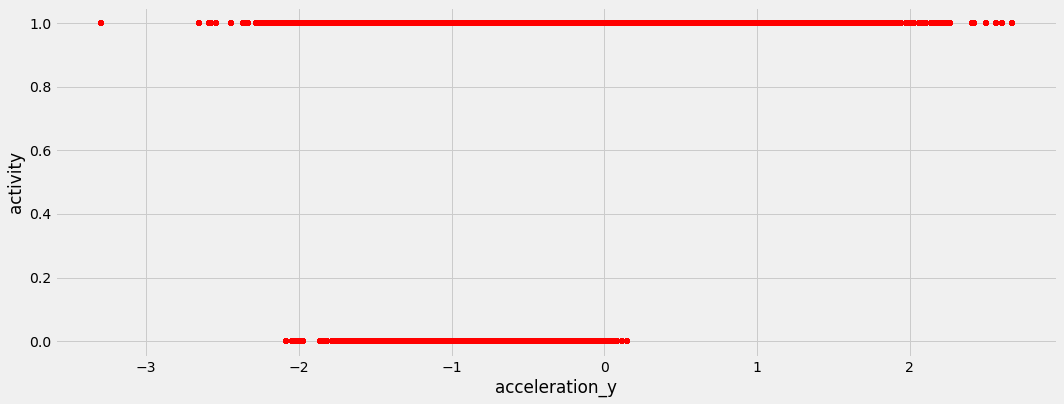

In [30]:
plt.scatter(rw1['acceleration_y'],rw1['activity'],marker='+',color='red')
plt.xlabel("acceleration_y")
plt.ylabel("activity")

Text(0, 0.5, 'activity')

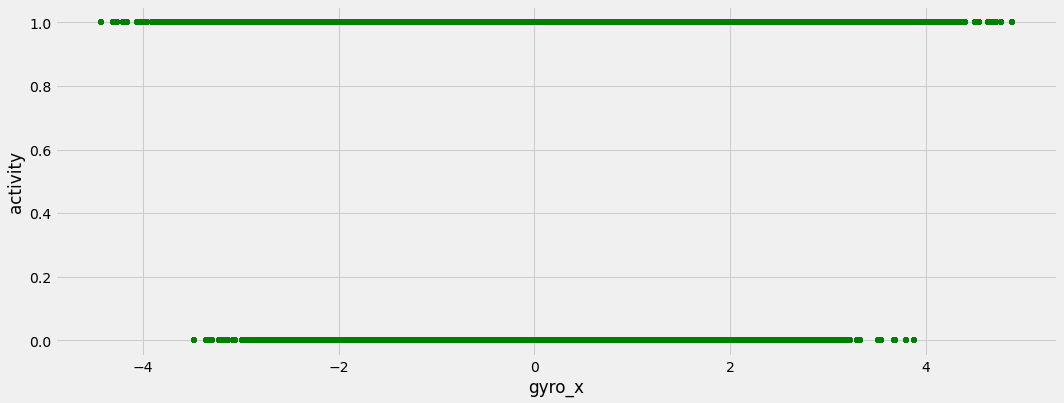

In [152]:
plt.scatter(rw1['gyro_x'],rw1['activity'],marker='+',color='green')
plt.xlabel("gyro_x")
plt.ylabel("activity")

### Target is binary classified so we will apply classifiaction machine learning models for prediction 

# Classification Models

In [32]:
cl_rw=rw1

In [34]:
cl_rw.head()

,activity,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Datetime
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017-06-30 13:51:15.847724020
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017-06-30 13:51:16.246945023
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,2017-06-30 13:51:16.446233987
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,2017-06-30 13:51:16.646117985
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,2017-06-30 13:51:16.846738994


In [35]:
# Split the data into featues and Target
X = cl_rw.drop('activity',axis=1)
y= cl_rw.activity

In [36]:
X.head()

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Datetime
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017-06-30 13:51:15.847724020
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017-06-30 13:51:16.246945023
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,2017-06-30 13:51:16.446233987
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,2017-06-30 13:51:16.646117985
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,2017-06-30 13:51:16.846738994


In [37]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: activity, dtype: int64

In [38]:
cl_rw.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

## Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X.iloc[:,1:7])
X

array([[ 0.33668266, -0.33231618,  0.6293112 , -0.05039065, -0.00392358,
        -1.5419494 ],
       [ 0.74013342, -0.85156246,  0.16342314, -0.14349622, -0.013684  ,
         0.05462392],
       [ 0.50997229, -1.39586742,  0.79323478, -0.72973418,  0.05764218,
        -1.28448139],
       ...,
       [ 0.52859919, -0.93463579,  0.06420624, -1.16015794, -0.26395131,
        -0.67066385],
       [ 0.3307379 , -0.44895295,  0.4890107 , -1.21321296,  0.34937044,
        -0.93910129],
       [ 0.3852315 , -0.36177911,  0.45778716,  0.09106279,  0.87409756,
         0.65768097]])

## Train_Test_Split
##### Split the data into train amd test datasets

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [41]:
len(X_train)

62011

In [42]:
len(X_test)

26577

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [46]:
print("Test data accuracy is : ",lr_model.score(X_test, y_test)) 
print("Train data accuracy is : ",lr_model.score(X_train, y_train))

Test data accuracy is :  0.8523159122549573
Train data accuracy is :  0.8535098611536663


In [47]:
predicted =lr_model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
logi = accuracy_score(y_test, predicted)
print ("Accuracy for Logistic Regression: {}".format(logi))

Accuracy for Logistic Regression: 0.8523159122549573


In [50]:
pred_prob= lr_model.predict_proba(X_test)
pred_prob

array([[0.85669519, 0.14330481],
       [0.61434695, 0.38565305],
       [0.97310117, 0.02689883],
       ...,
       [0.87823497, 0.12176503],
       [0.98274755, 0.01725245],
       [0.89914718, 0.10085282]])

In [51]:
from sklearn .metrics import confusion_matrix
cm= confusion_matrix(y_test,predicted)
cm

array([[11858,  1380],
       [ 2545, 10794]], dtype=int64)

Text(36.1, 0.5, 'Truth')

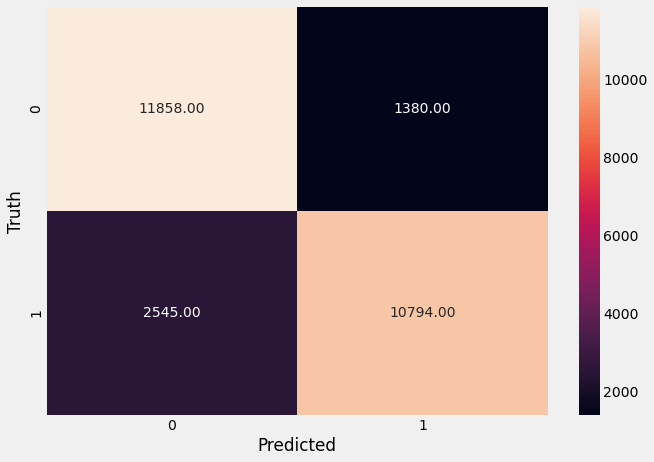

In [52]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     13238
           1       0.89      0.81      0.85     13339

    accuracy                           0.85     26577
   macro avg       0.85      0.85      0.85     26577
weighted avg       0.86      0.85      0.85     26577



 ### Roc Curve 

Text(0, 0.5, 'True Positive Rate')

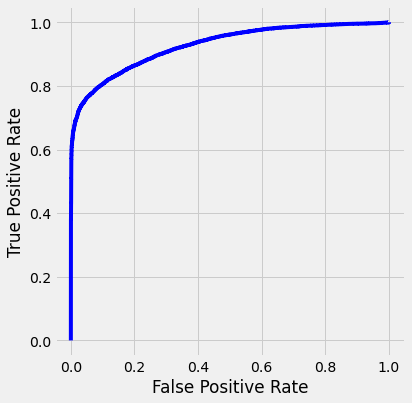

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

fpr, tpr, threshold= roc_curve(y_test, pred_prob[:,1]) #pass the actual test DV and 
#predicted probability (only P(y)=1)
#***DRAW ROC CURVE*****


plt.plot(fpr, tpr, label='ROC curve', color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [55]:
from sklearn.metrics import roc_curve,roc_auc_score
AUC_Test = roc_auc_score(y_test,  pred_prob[:,1])
AUC_Test

0.9272777625937441

### AUC(Area under Curve) is nearly 93%, which is good. this means model is covering 93% of the datapoints well.

# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier 

In [57]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
print("Test data accuracy is : ",dt_model.score(X_test, y_test)) 
print("Train data accuracy is : ",dt_model.score(X_train, y_train))

Test data accuracy is :  0.9823907890281071
Train data accuracy is :  1.0


In [60]:
predicted =dt_model.predict(X_test)

In [61]:
deci = accuracy_score(y_test, predicted)
print ("Accuracy for Decision Tree: {}".format(deci))

Accuracy for Decision Tree: 0.9823907890281071


In [62]:
from sklearn .metrics import confusion_matrix
cm= confusion_matrix(y_test,predicted)
cm

array([[13003,   235],
       [  233, 13106]], dtype=int64)

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13238
           1       0.98      0.98      0.98     13339

    accuracy                           0.98     26577
   macro avg       0.98      0.98      0.98     26577
weighted avg       0.98      0.98      0.98     26577



# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [65]:
print("Test data accuracy is : ",rf_model.score(X_test, y_test)) 
print("Train data accuracy is : ",rf_model.score(X_train, y_train))

Test data accuracy is :  0.9899160928622494
Train data accuracy is :  1.0


In [67]:
predicted =rf_model.predict(X_test)

In [68]:
random = accuracy_score(y_test, predicted)
print ("Accuracy for Random Forest: {}".format(random))

Accuracy for Random Forest: 0.9899160928622494


In [69]:
from sklearn .metrics import confusion_matrix
cm= confusion_matrix(y_test,predicted)
cm

array([[13131,   107],
       [  161, 13178]], dtype=int64)

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13238
           1       0.99      0.99      0.99     13339

    accuracy                           0.99     26577
   macro avg       0.99      0.99      0.99     26577
weighted avg       0.99      0.99      0.99     26577



# K-Nearest Neighbor

In [71]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [72]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}

In [73]:
print("Test data accuracy is : ",knn_model.score(X_test, y_test)) 
print("Train data accuracy is : ",knn_model.score(X_train, y_train))

Test data accuracy is :  0.9870188508861045
Train data accuracy is :  0.9903081711309284


In [75]:
predicted =knn_model.predict(X_test)

In [76]:
kn = accuracy_score(y_test, predicted)
print ("Accuracy for KNN: {}".format(kn))

Accuracy for KNN: 0.9870188508861045


In [77]:
from sklearn .metrics import confusion_matrix
cm= confusion_matrix(y_test,predicted)
cm

array([[13197,    41],
       [  304, 13035]], dtype=int64)

In [78]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13238
           1       1.00      0.98      0.99     13339

    accuracy                           0.99     26577
   macro avg       0.99      0.99      0.99     26577
weighted avg       0.99      0.99      0.99     26577



In [79]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [80]:
e=pd.DataFrame(error,columns=['mean error'])
e

,mean error
0,0.012078
1,0.015163
2,0.010949
3,0.013470
4,0.011213
5,0.012981
6,0.011589
7,0.012643
8,0.011928
9,0.012944


- You can see after k= 5 error is somewhat fluctuated, so best value for k is 5

Text(0, 0.5, 'Mean Error')

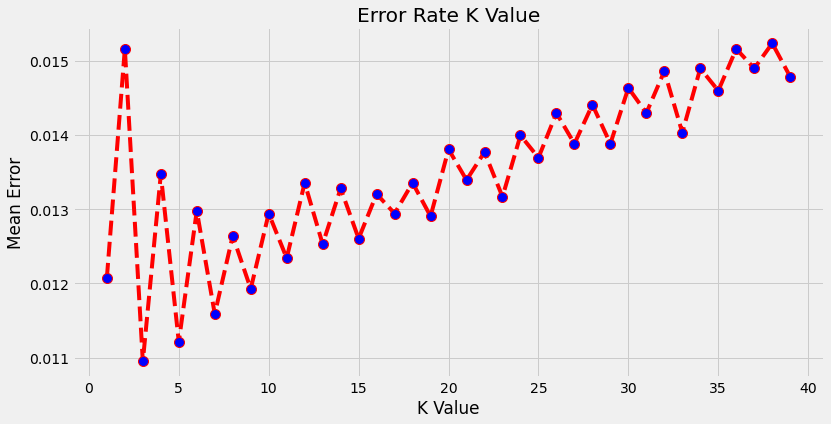

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# SVM (Support Vector Machine)

In [82]:
from sklearn.svm import SVC

svm_model=SVC()
svm_model.fit(X_train,y_train)

SVC()

In [84]:
print("Test data accuracy is : ",svm_model.score(X_test, y_test)) 
print("Train data accuracy is : ",svm_model.score(X_train, y_train))

Test data accuracy is :  0.987470369116153
Train data accuracy is :  0.9876957314024931


In [85]:
predicted =svm_model.predict(X_test)

In [86]:
svm = accuracy_score(y_test, predicted)
print ("Accuracy for SVM: {}".format(svm))

Accuracy for SVM: 0.987470369116153


In [87]:
from sklearn .metrics import confusion_matrix
cm= confusion_matrix(y_test,predicted)
cm

array([[13147,    91],
       [  242, 13097]], dtype=int64)

In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     13238
           1       0.99      0.98      0.99     13339

    accuracy                           0.99     26577
   macro avg       0.99      0.99      0.99     26577
weighted avg       0.99      0.99      0.99     26577



# Naive Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [90]:
print("Test data accuracy is : ",nb_model.score(X_test, y_test)) 
print("Train data accuracy is : ",nb_model.score(X_train, y_train))

Test data accuracy is :  0.9562779847236332
Train data accuracy is :  0.9564593378594121


In [93]:
predicted =nb_model.predict(X_test)

In [94]:
naive = accuracy_score(y_test, predicted)
print ("Accuracy for Naive Bayes: {}".format(naive))

Accuracy for Naive Bayes: 0.9562779847236332


In [95]:
from sklearn .metrics import confusion_matrix
cm= confusion_matrix(y_test,predicted)
cm

array([[13125,   113],
       [ 1049, 12290]], dtype=int64)

In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     13238
           1       0.99      0.92      0.95     13339

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577



# Results:-

In [98]:
cl_models = pd.DataFrame([logi,deci,random,kn,svm,naive],
             index=['Logistic Regression','Decision Tree','Random Forest','KNN','SVM','Naive Bayes'],columns=['accuracy'])

cl_models.sort_values('accuracy', ascending=False)

,accuracy
Random Forest,0.989916
SVM,0.987470
KNN,0.987019
Decision Tree,0.982391
Naive Bayes,0.956278
Logistic Regression,0.852316


<AxesSubplot:>

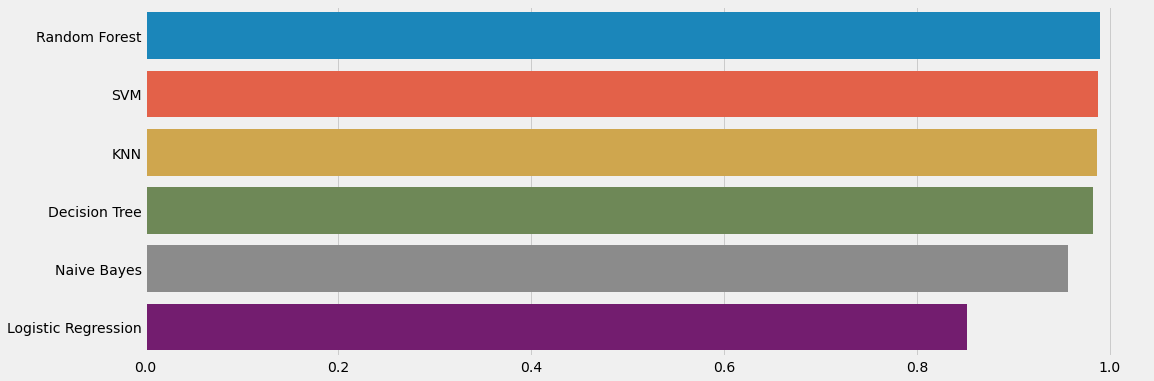

In [99]:
sns.barplot(x = cl_models.accuracy.sort_values(ascending=False).values, 
            y = cl_models.accuracy.sort_values(ascending=False).index)

### Here we can see 'Random Forest' classifier Model is working very good with for this dataset, 
### and good precision and recall value,f1-score is also better that means model predicted with good accuracy and there no Overfitting or Underfitting problem
### and There is no major difference between others classification models except Logistic Regression which comparatively low than others.

# Part 2 :-

# Repeating models by using 'Naive Bayes' 
 
- 1) activity as Target and acceleration_x,acceleration_y,acceleration_z as predictors 

- 2) activity as Target and gyro_x,gyro_y,gyro_z as predictors 
### compare and check their Accuracy

# 1) Using acceleration_x,acceleration_y,acceleration_z as predictors

In [100]:
rw1.head()

,activity,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Datetime
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017-06-30 13:51:15.847724020
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017-06-30 13:51:16.246945023
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,2017-06-30 13:51:16.446233987
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,2017-06-30 13:51:16.646117985
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,2017-06-30 13:51:16.846738994


In [101]:
NB_1 = rw1.drop([ 'Datetime', 'wrist','gyro_x','gyro_y','gyro_z'], axis = 1)
NB_1.head()

,activity,acceleration_x,acceleration_y,acceleration_z
0,0,0.2650,-0.7814,-0.0076
1,0,0.6722,-1.1233,-0.2344
2,0,0.4399,-1.4817,0.0722
3,0,0.3031,-0.8125,0.0888
4,0,0.4814,-0.9312,0.0359


In [102]:
# Split the data into featues and Target
F = NB_1.drop('activity',axis=1)
t= NB_1.activity

In [103]:
F.head()

,acceleration_x,acceleration_y,acceleration_z
0,0.2650,-0.7814,-0.0076
1,0.6722,-1.1233,-0.2344
2,0.4399,-1.4817,0.0722
3,0.3031,-0.8125,0.0888
4,0.4814,-0.9312,0.0359


In [104]:
t.head()

0    0
1    0
2    0
3    0
4    0
Name: activity, dtype: int64

In [105]:
t.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

In [106]:
F = scaler.fit_transform(F)
F

array([[ 0.33668266, -0.33231618,  0.6293112 ],
       [ 0.74013342, -0.85156246,  0.16342314],
       [ 0.50997229, -1.39586742,  0.79323478],
       ...,
       [ 0.52859919, -0.93463579,  0.06420624],
       [ 0.3307379 , -0.44895295,  0.4890107 ],
       [ 0.3852315 , -0.36177911,  0.45778716]])

In [107]:
# split the data into train amd test datasets
F_train,F_test,t_train,t_test = train_test_split(F,t,test_size=0.3,random_state=0)

In [108]:
len(F_train)

62011

In [109]:
len(F_test)

26577

In [110]:
NB1_model = GaussianNB()
NB1_model.fit(F_train,t_train)

GaussianNB()

In [112]:
print("Test data accuracy is : ",NB1_model.score(F_test, t_test)) 
print("Train data accuracy is : ",NB1_model.score(F_train, t_train))

Test data accuracy is :  0.9570681416262181
Train data accuracy is :  0.9575559174985083


In [114]:
predicted =NB1_model.predict(F_test)

In [115]:
naive_bayes1 = accuracy_score(t_test, predicted)
print ("Accuracy for Naive Bayes with acceleration: {}".format(naive_bayes1))

Accuracy for Naive Bayes with acceleration: 0.9570681416262181


In [116]:
from sklearn .metrics import confusion_matrix
cm= confusion_matrix(t_test,predicted)
cm

array([[13161,    77],
       [ 1064, 12275]], dtype=int64)

Text(36.1, 0.5, 'Truth')

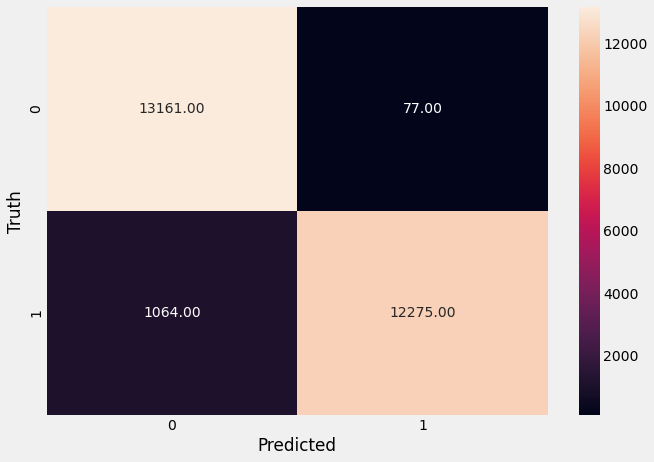

In [117]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [118]:
from sklearn.metrics import classification_report

print(classification_report(t_test,predicted))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     13238
           1       0.99      0.92      0.96     13339

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577



# 2) Using gyro_x,gyro_y,gyro_z as predictors

In [119]:
rw1.head()

,activity,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Datetime
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017-06-30 13:51:15.847724020
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017-06-30 13:51:16.246945023
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,2017-06-30 13:51:16.446233987
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,2017-06-30 13:51:16.646117985
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,2017-06-30 13:51:16.846738994


In [120]:
NB_2 = rw1.drop([ 'Datetime', 'wrist','acceleration_x','acceleration_y','acceleration_z'], axis = 1)
NB_2.head()

,activity,gyro_x,gyro_y,gyro_z
0,0,-0.0590,0.0325,-2.9296
1,0,-0.1757,0.0208,0.1269
2,0,-0.9105,0.1063,-2.4367
3,0,0.1199,-0.4099,-2.9336
4,0,0.0527,0.4379,2.4922


In [121]:
# Split the data into featues and Target
F = NB_2.drop('activity',axis=1)
t= NB_2.activity

In [122]:
F.head()

,gyro_x,gyro_y,gyro_z
0,-0.0590,0.0325,-2.9296
1,-0.1757,0.0208,0.1269
2,-0.9105,0.1063,-2.4367
3,0.1199,-0.4099,-2.9336
4,0.0527,0.4379,2.4922


In [123]:
t.head()

0    0
1    0
2    0
3    0
4    0
Name: activity, dtype: int64

In [124]:
F = scaler.fit_transform(F)
F

array([[-0.05039065, -0.00392358, -1.5419494 ],
       [-0.14349622, -0.013684  ,  0.05462392],
       [-0.72973418,  0.05764218, -1.28448139],
       ...,
       [-1.16015794, -0.26395131, -0.67066385],
       [-1.21321296,  0.34937044, -0.93910129],
       [ 0.09106279,  0.87409756,  0.65768097]])

In [125]:
# split the data into train amd test datasets
F_train,F_test,t_train,t_test = train_test_split(F,t,test_size=0.3,random_state=0)

In [126]:
len(F_train)

62011

In [127]:
len(F_test)

26577

In [128]:
NB2_model = GaussianNB()
NB2_model.fit(F_train,t_train)

GaussianNB()

In [130]:
print("Test data accuracy is : ",NB2_model.score(F_test, t_test)) 
print("Train data accuracy is : ",NB2_model.score(F_train, t_train))

Test data accuracy is :  0.6471008766978967
Train data accuracy is :  0.6493525342277983


In [131]:
predicted =NB2_model.predict(F_test)

In [132]:
naive_bayes2 = accuracy_score(t_test, predicted)
print ("Accuracy for Naive Bayes with gyro: {}".format(naive_bayes2))

Accuracy for Naive Bayes with gyro: 0.6471008766978967


In [133]:
from sklearn .metrics import confusion_matrix
cm= confusion_matrix(t_test,predicted)
cm

array([[9884, 3354],
       [6025, 7314]], dtype=int64)

Text(36.1, 0.5, 'Truth')

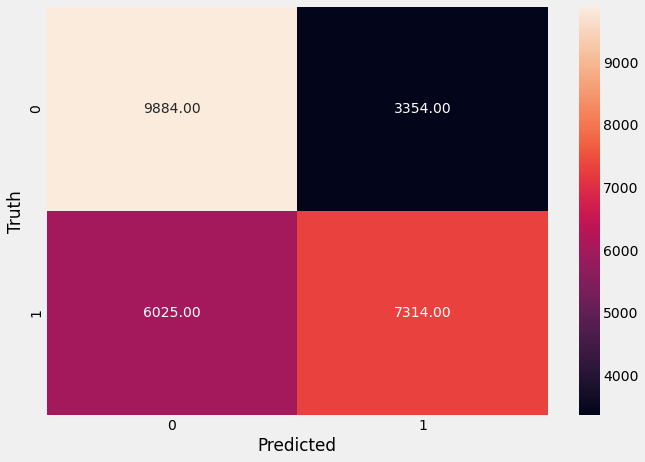

In [134]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [135]:
from sklearn.metrics import classification_report

print(classification_report(t_test,predicted))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68     13238
           1       0.69      0.55      0.61     13339

    accuracy                           0.65     26577
   macro avg       0.65      0.65      0.64     26577
weighted avg       0.65      0.65      0.64     26577



In [137]:
naive_models = pd.DataFrame([naive_bayes1 ,naive_bayes2],
             index=['Naive Bayes with acceleration','Naive Bayes with gyro'],columns=['accuracy'])

naive_models.sort_values('accuracy', ascending=False)

,accuracy
Naive Bayes with acceleration,0.957068
Naive Bayes with gyro,0.647101


<AxesSubplot:>

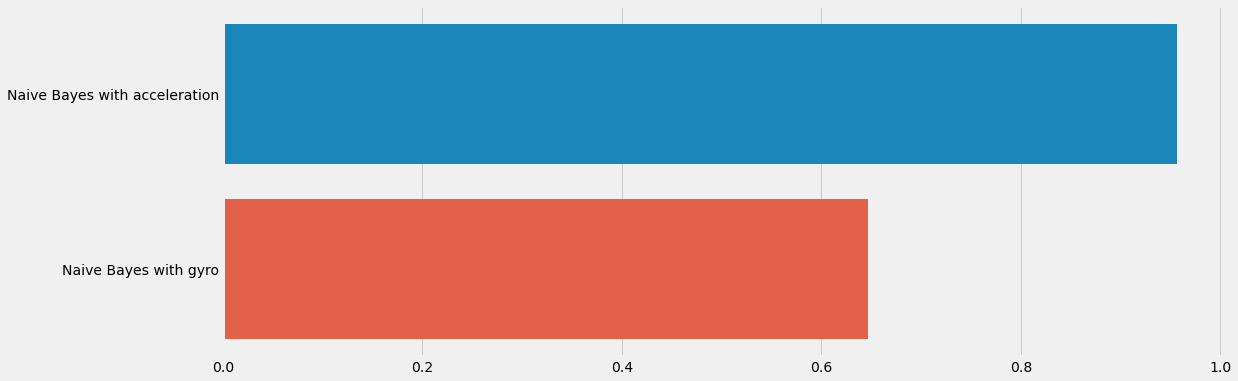

In [138]:
sns.barplot(x = naive_models.accuracy.sort_values(ascending=False).values, 
            y = naive_models.accuracy.sort_values(ascending=False).index)

# From above two models here we can say 'Naive Bayes with acceleration' model is predicting and working very good than 'Naive Bayes with gyro'.
# Data collected using 'acceleration' is more accurate for predicting 'RUN or WALK'.
